## **Feature Extraction with Technical Indicators**

This is a Step by Step notebook of Extracting features for Stock prediction. In this wrokbook, AlphaVantage is used to extract stock data for the previous 20 years.

In [1]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
from alpha_vantage.timeseries import TimeSeries

%matplotlib inline

In [2]:
os.chdir(r'C:\Users\Israel\Documents\GitHub\Stock-Portfolio-Optimization')

In [6]:
ALPHA_VANTAGE_API_KEY = 'XAGC5LBB1SI9RDLW'
ts = TimeSeries(key= ALPHA_VANTAGE_API_KEY, output_format='pandas')

In [7]:
df_NFLX, NFLX_info = ts.get_daily('NFLX', outputsize='full')

In [8]:
df_NFLX

,1. open,2. high,3. low,4. close,5. volume
date,,,,,
2022-09-14,219.82,228.0000,215.80,224.12,8230340.0
2022-09-13,226.50,227.6900,217.72,218.13,8000128.0
2022-09-12,233.61,239.4900,233.37,236.53,6047425.0
2022-09-09,229.62,234.7799,229.62,233.57,6702060.0
2022-09-08,224.16,228.7350,221.30,227.44,6737436.0
...,...,...,...,...,...
2002-05-30,15.51,15.5100,15.00,15.00,725300.0
2002-05-29,16.30,16.3000,15.20,15.45,482700.0
2002-05-28,16.99,17.2500,16.20,16.20,472100.0


In [9]:
NFLX_info

{'1. Information': 'Daily Prices (open, high, low, close) and Volumes',
 '2. Symbol': 'NFLX',
 '3. Last Refreshed': '2022-09-14',
 '4. Output Size': 'Full size',
 '5. Time Zone': 'US/Eastern'}

In [10]:
df_NFLX = df_NFLX.rename(columns={'1. open' : 'Open', '2. high': 'High', '3. low':'Low', '4. close': 'Close', '5. volume': 'Volume' })
df_NFLX = df_NFLX.rename_axis(['Date'])
df_NFLX

,Open,High,Low,Close,Volume
Date,,,,,
2022-09-14,219.82,228.0000,215.80,224.12,8230340.0
2022-09-13,226.50,227.6900,217.72,218.13,8000128.0
2022-09-12,233.61,239.4900,233.37,236.53,6047425.0
2022-09-09,229.62,234.7799,229.62,233.57,6702060.0
2022-09-08,224.16,228.7350,221.30,227.44,6737436.0
...,...,...,...,...,...
2002-05-30,15.51,15.5100,15.00,15.00,725300.0
2002-05-29,16.30,16.3000,15.20,15.45,482700.0
2002-05-28,16.99,17.2500,16.20,16.20,472100.0


In [14]:
NFLX = df_NFLX.sort_index(ascending=True, axis=0)
#slicing the data for 20 years from '2002-01-01' to today
NFLX = NFLX.loc['2002-01-01':]
NFLX

,Open,High,Low,Close,Volume
Date,,,,,
2002-05-23,16.19,17.4000,16.04,16.75,7485000.0
2002-05-24,17.00,17.1500,16.76,16.94,793200.0
2002-05-28,16.99,17.2500,16.20,16.20,472100.0
2002-05-29,16.30,16.3000,15.20,15.45,482700.0
2002-05-30,15.51,15.5100,15.00,15.00,725300.0
...,...,...,...,...,...
2022-09-08,224.16,228.7350,221.30,227.44,6737436.0
2022-09-09,229.62,234.7799,229.62,233.57,6702060.0
2022-09-12,233.61,239.4900,233.37,236.53,6047425.0


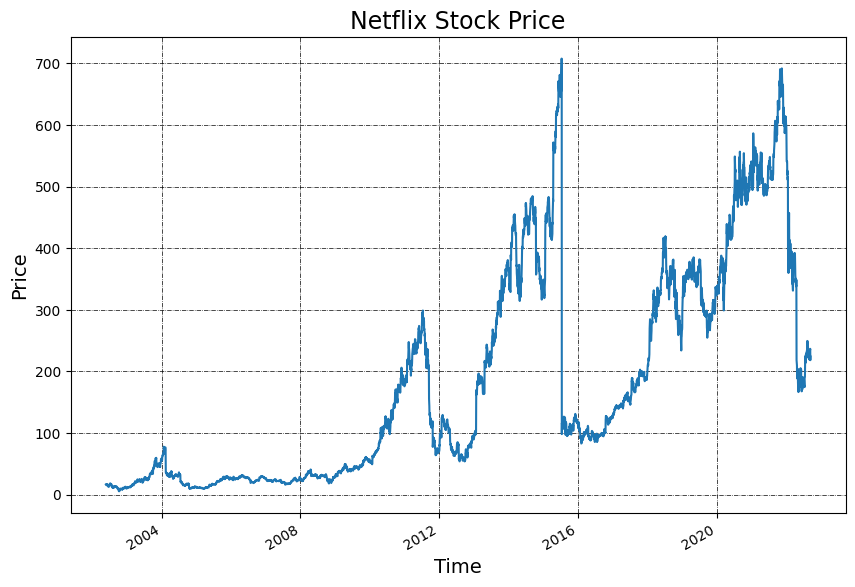

In [15]:
NFLX['Close'].plot(figsize=(10, 7))
plt.title("Netflix Stock Price", fontsize=17)
plt.ylabel('Price', fontsize=14)
plt.xlabel('Time', fontsize=14)
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)
plt.show()

### **Using Index Fund Nasdaq-100 ETF QQQ's Previous Day & Moving Average price as a feature**

In [22]:
QQQ, QQQ_info = ts.get_daily('QQQ', outputsize='full') 
QQQ = QQQ.rename(columns={'1. open' : 'Open', '2. high': 'High', '3. low':'Low', '4. close': 'QQQ_Close', '5. volume': 'Volume' })
QQQ = QQQ.rename_axis(['Date'])
QQQ = QQQ.drop(columns=['Open', 'High', 'Low', 'Volume'])

In [23]:
QQQ = QQQ.sort_index(ascending=True, axis=0)
#slicing the data for 20 years from '2002-01-01' to today
QQQ = QQQ.loc['2002-01-01':]
QQQ

,QQQ_Close
Date,
2002-01-02,40.11
2002-01-03,41.50
2002-01-04,41.67
2002-01-07,41.21
2002-01-08,41.49
...,...
2022-09-08,300.52
2022-09-09,307.09
2022-09-12,310.74


In [24]:
QQQ['QQQ(t-1)'] = QQQ.QQQ_Close.shift(periods=1)
QQQ['QQQ(t-2)'] =  QQQ.QQQ_Close.shift(periods=2)
QQQ['QQQ(t-5)'] =  QQQ.QQQ_Close.shift(periods=5)
QQQ

,QQQ_Close,QQQ(t-1),QQQ(t-2),QQQ(t-5)
Date,,,,
2002-01-02,40.11,NaN,NaN,NaN
2002-01-03,41.50,40.11,NaN,NaN
2002-01-04,41.67,41.50,40.11,NaN
2002-01-07,41.21,41.67,41.50,NaN
2002-01-08,41.49,41.21,41.67,NaN
...,...,...,...,...
2022-09-08,300.52,298.97,293.05,299.27
2022-09-09,307.09,300.52,298.97,299.40
2022-09-12,310.74,307.09,300.52,295.17


In [25]:
QQQ['QQQ_MA10'] = QQQ.QQQ_Close.rolling(window=10).mean()
#QQQ['QQQ_MA10_t'] = QQQ.QQQ_ClosePrev1.rolling(window=10).mean()
QQQ['QQQ_MA20'] = QQQ.QQQ_Close.rolling(window=20).mean()
QQQ['QQQ_MA50'] = QQQ.QQQ_Close.rolling(window=50).mean()

### **Creating more features and technical indicators from the Netflix stock itself**

### Bollinger Bands

In [26]:
NFLX['MA_20'] = NFLX.Close.rolling(window=20).mean()
NFLX['SD20'] = NFLX.Close.rolling(window=20).std()
NFLX['Upper_Band'] = NFLX.Close.rolling(window=20).mean() + (NFLX['SD20']*2)
NFLX['Lower_Band'] = NFLX.Close.rolling(window=20).mean() - (NFLX['SD20']*2)
NFLX.tail()

,Open,High,Low,Close,Volume,MA_20,SD20,Upper_Band,Lower_Band
Date,,,,,,,,,
2022-09-08,224.16,228.7350,221.30,227.44,6737436.0,232.5980,10.020821,252.639641,212.556359
2022-09-09,229.62,234.7799,229.62,233.57,6702060.0,232.1415,9.740438,251.622377,212.660623
2022-09-12,233.61,239.4900,233.37,236.53,6047425.0,231.5030,8.942323,249.387647,213.618353
2022-09-13,226.50,227.6900,217.72,218.13,8000128.0,229.9540,8.398560,246.751121,213.156879
2022-09-14,219.82,228.0000,215.80,224.12,8230340.0,228.8755,7.620371,244.116242,213.634758


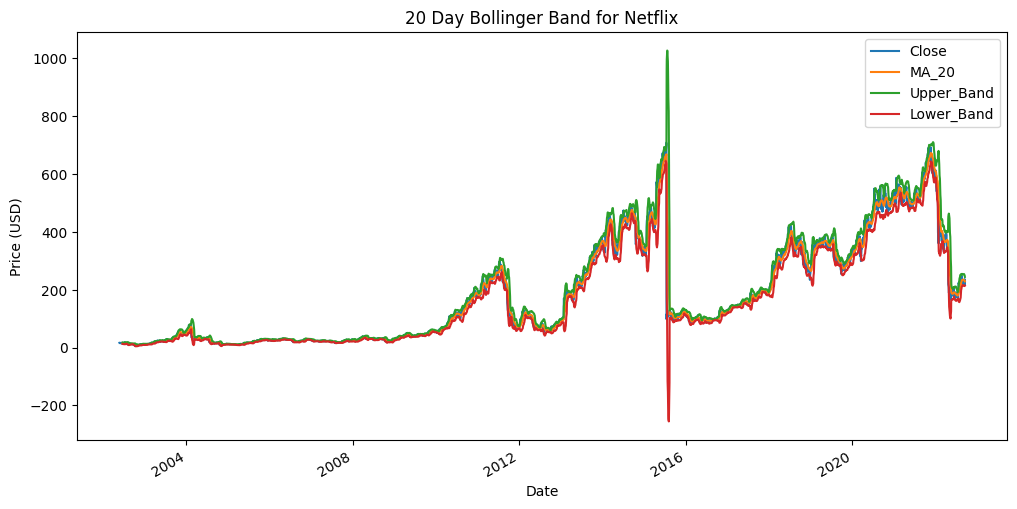

In [27]:
NFLX[['Close', 'MA_20', 'Upper_Band', 'Lower_Band']].plot(figsize=(12,6))
plt.title('20 Day Bollinger Band for Netflix')
plt.ylabel('Price (USD)')
plt.show();

### Shifting for Lagged data - Adding Previous Day prices

In [28]:
NFLX['NFLX_Close(t-1)'] = NFLX.Close.shift(periods=1)
NFLX['NFLX_Close(t-2)'] = NFLX.Close.shift(periods=2)
NFLX['NFLX_Close(t-5)'] = NFLX.Close.shift(periods=5)
NFLX['NFLX_Close(t-10)'] = NFLX.Close.shift(periods=10)
NFLX['NFLX_Open(t-1)'] = NFLX.Open.shift(periods=1)

In [29]:
NFLX.head(20)

,Open,High,Low,Close,Volume,MA_20,SD20,Upper_Band,Lower_Band,NFLX_Close(t-1),NFLX_Close(t-2),NFLX_Close(t-5),NFLX_Close(t-10),NFLX_Open(t-1)
Date,,,,,,,,,,,,,,
2002-05-23,16.19,17.40,16.04,16.75,7485000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2002-05-24,17.00,17.15,16.76,16.94,793200.0,NaN,NaN,NaN,NaN,16.75,NaN,NaN,NaN,16.19
2002-05-28,16.99,17.25,16.20,16.20,472100.0,NaN,NaN,NaN,NaN,16.94,16.75,NaN,NaN,17.00
2002-05-29,16.30,16.30,15.20,15.45,482700.0,NaN,NaN,NaN,NaN,16.20,16.94,NaN,NaN,16.99
2002-05-30,15.51,15.51,15.00,15.00,725300.0,NaN,NaN,NaN,NaN,15.45,16.20,NaN,NaN,16.30
2002-05-31,15.10,15.10,15.00,15.07,604600.0,NaN,NaN,NaN,NaN,15.00,15.45,16.75,NaN,15.51
2002-06-03,15.12,16.09,15.07,15.80,225100.0,NaN,NaN,NaN,NaN,15.07,15.00,16.94,NaN,15.10
2002-06-04,15.90,15.96,15.55,15.65,221800.0,NaN,NaN,NaN,NaN,15.80,15.07,16.20,NaN,15.12
2002-06-05,15.55,16.23,15.50,16.06,109400.0,NaN,NaN,NaN,NaN,15.65,15.80,15.45,NaN,15.90


### Simple Moving Averages for different periods 

In [30]:
NFLX['MA5'] = NFLX.Close.rolling(window=5).mean()
NFLX['MA10'] = NFLX.Close.rolling(window=10).mean()
NFLX['MA20'] = NFLX.Close.rolling(window=20).mean()
NFLX['MA50'] = NFLX.Close.rolling(window=50).mean()
NFLX['MA200'] = NFLX.Close.rolling(window=200).mean()

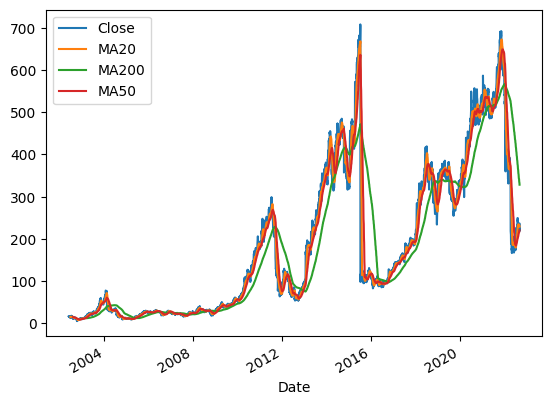

In [31]:
NFLX[['Close', 'MA20', 'MA200', 'MA50']].plot()
plt.show()

### Moving Average Convergance Divergance 

In [32]:
NFLX['EMA_12'] = NFLX.Close.ewm(span=12, adjust=False).mean()
NFLX['EMA_26'] = NFLX.Close.ewm(span=26, adjust=False).mean()
NFLX['MACD'] = NFLX['EMA_12'] - NFLX['EMA_26']

NFLX['MACD_EMA'] = NFLX.MACD.ewm(span=9, adjust=False).mean()

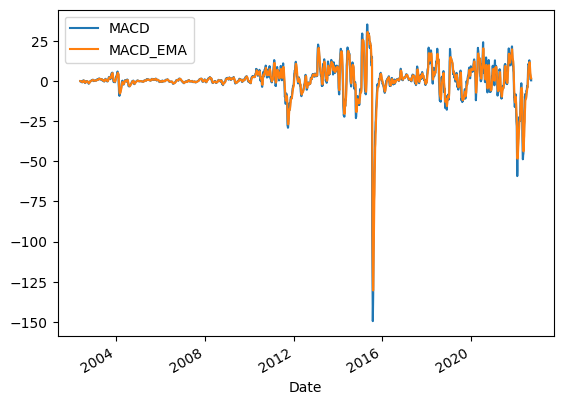

In [33]:
NFLX[['MACD', 'MACD_EMA']].plot()
plt.show()

### Exponential Moving Averages

In [34]:
NFLX['EMA10'] = NFLX.Close.ewm(span=5, adjust=False).mean().fillna(0)
NFLX['EMA20'] = NFLX.Close.ewm(span=5, adjust=False).mean().fillna(0)
NFLX['EMA50'] = NFLX.Close.ewm(span=5, adjust=False).mean().fillna(0)
NFLX['EMA100'] = NFLX.Close.ewm(span=5, adjust=False).mean().fillna(0)
NFLX['EMA200'] = NFLX.Close.ewm(span=5, adjust=False).mean().fillna(0)

### Average True Range

In [35]:
import talib

In [36]:
NFLX['ATR'] = talib.ATR(NFLX['High'].values, NFLX['Low'].values, NFLX['Close'].values, timeperiod=14)

### Average Directional Index

In [37]:
NFLX['ADX'] = talib.ADX(NFLX['High'], NFLX['Low'], NFLX['Close'], timeperiod=14)

### Commodity Channel Index

In [38]:
tp = (NFLX['High'] + NFLX['Low'] + NFLX['Close']) /3
ma = tp/20 
md = (tp-ma)/20
NFLX['CCI'] = (tp-ma)/(0.015 * md)

### Rate of Change

In [39]:
NFLX['ROC'] = ((NFLX['Close'] - NFLX['Close'].shift(10)) / (NFLX['Close'].shift(10)))*100

### Relative Strength Index 

In [40]:
NFLX['RSI'] = talib.RSI(NFLX.Close.values, timeperiod=14)

### William's %R 

In [41]:
NFLX['William%R'] = talib.WILLR(NFLX.High.values, NFLX.Low.values, NFLX.Close.values, 14) 

### Stochastic %K

In [42]:
NFLX['SO%K'] = ((NFLX.Close - NFLX.Low.rolling(window=14).min()) / (NFLX.High.rolling(window=14).max() - NFLX.Low.rolling(window=14).min())) * 100

### Standard Deviation last 5 days returns

In [43]:
NFLX['per_change'] = NFLX.Close.pct_change()
NFLX['STD5'] = NFLX.per_change.rolling(window=5).std()

In [44]:
NFLX.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'MA_20', 'SD20', 'Upper_Band',
       'Lower_Band', 'NFLX_Close(t-1)', 'NFLX_Close(t-2)', 'NFLX_Close(t-5)',
       'NFLX_Close(t-10)', 'NFLX_Open(t-1)', 'MA5', 'MA10', 'MA20', 'MA50',
       'MA200', 'EMA_12', 'EMA_26', 'MACD', 'MACD_EMA', 'EMA10', 'EMA20',
       'EMA50', 'EMA100', 'EMA200', 'ATR', 'ADX', 'CCI', 'ROC', 'RSI',
       'William%R', 'SO%K', 'per_change', 'STD5'],
      dtype='object')

### **Using Vanguard 500 Index Fund ETF**

In [48]:
SnP, SnP_info = ts.get_daily('VOO', outputsize='full') 
SnP = SnP.rename(columns={'1. open' : 'Open', '2. high': 'High', '3. low':'Low', '4. close': 'SnP_Close', '5. volume': 'Volume' })
SnP = SnP.rename_axis(['Date'])
SnP = SnP.drop(columns=['Open', 'High', 'Low', 'Volume'])

In [49]:
SnP = SnP.sort_index(ascending=True, axis=0)
#slicing the data for 20 years from '2002-01-01' to today
SnP = SnP.loc['2002-01-01':]
SnP

,SnP_Close
Date,
2010-09-09,50.660
2010-09-10,50.890
2010-09-13,51.530
2010-09-14,51.519
2010-09-15,51.650
...,...
2022-09-08,368.070
2022-09-09,373.750
2022-09-12,377.860


In [50]:
SnP['SnP(t-1))'] = SnP.SnP_Close.shift(periods=1)
SnP['SnP(t-5)'] =  SnP.SnP_Close.shift(periods=5)
SnP

,SnP_Close,SnP(t-1)),SnP(t-5)
Date,,,
2010-09-09,50.660,NaN,NaN
2010-09-10,50.890,50.660,NaN
2010-09-13,51.530,50.890,NaN
2010-09-14,51.519,51.530,NaN
2010-09-15,51.650,51.519,NaN
...,...,...,...
2022-09-08,368.070,365.680,363.15
2022-09-09,373.750,368.070,364.27
2022-09-12,377.860,373.750,360.45


### **Merging of all columns**

In [51]:
NFLX = NFLX.merge(QQQ, left_index=True, right_index=True)
NFLX

,Open,High,Low,Close,Volume,MA_20,SD20,Upper_Band,Lower_Band,NFLX_Close(t-1),...,QQQ_MA10_x,QQQ_MA20_x,QQQ_MA50_x,QQQ_Close_y,QQQ(t-1)_y,QQQ(t-2)_y,QQQ(t-5)_y,QQQ_MA10_y,QQQ_MA20_y,QQQ_MA50_y
Date,,,,,,,,,,,,,,,,,,,,,
2002-05-23,16.19,17.4000,16.04,16.75,7485000.0,NaN,NaN,NaN,NaN,NaN,...,31.846,31.2275,33.5086,32.03,31.40,31.33,32.86,31.846,31.2275,33.5086
2002-05-24,17.00,17.1500,16.76,16.94,793200.0,NaN,NaN,NaN,NaN,16.75,...,32.014,31.2375,33.3962,31.24,32.03,31.40,32.93,32.014,31.2375,33.3962
2002-05-28,16.99,17.2500,16.20,16.20,472100.0,NaN,NaN,NaN,NaN,16.94,...,32.048,31.2365,33.2736,31.10,31.24,32.03,32.21,32.048,31.2365,33.2736
2002-05-29,16.30,16.3000,15.20,15.45,482700.0,NaN,NaN,NaN,NaN,16.20,...,31.819,31.1640,33.1304,30.28,31.10,31.24,31.33,31.819,31.1640,33.1304
2002-05-30,15.51,15.5100,15.00,15.00,725300.0,NaN,NaN,NaN,NaN,15.45,...,31.592,31.1130,32.9936,30.54,30.28,31.10,31.40,31.592,31.1130,32.9936
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-09-08,224.16,228.7350,221.30,227.44,6737436.0,232.5980,10.020821,252.639641,212.556359,228.96,...,301.983,313.1870,306.0938,300.52,298.97,293.05,299.27,301.983,313.1870,306.0938
2022-09-09,229.62,234.7799,229.62,233.57,6702060.0,232.1415,9.740438,251.622377,212.660623,227.44,...,300.634,312.3375,306.5596,307.09,300.52,298.97,299.40,300.634,312.3375,306.5596
2022-09-12,233.61,239.4900,233.37,236.53,6047425.0,231.5030,8.942323,249.387647,213.618353,233.57,...,300.964,311.3550,307.1688,310.74,307.09,300.52,295.17,300.964,311.3550,307.1688


In [52]:
NFLX = NFLX.merge(SnP, left_index=True, right_index=True)
NFLX

,Open,High,Low,Close,Volume,MA_20,SD20,Upper_Band,Lower_Band,NFLX_Close(t-1),...,QQQ_Close_y,QQQ(t-1)_y,QQQ(t-2)_y,QQQ(t-5)_y,QQQ_MA10_y,QQQ_MA20_y,QQQ_MA50_y,SnP_Close,SnP(t-1)),SnP(t-5)
Date,,,,,,,,,,,,,,,,,,,,,
2010-09-09,148.3000,149.7386,144.80,145.68,3994200.0,131.86275,7.424685,146.712119,117.013381,146.00,...,46.43,46.25,45.70,44.76,44.909,44.8276,45.09965,50.660,NaN,NaN
2010-09-10,146.6300,146.8700,144.40,146.16,2639300.0,132.51825,8.084426,148.687103,116.349397,145.68,...,46.60,46.43,46.25,45.26,45.215,44.9056,45.17745,50.890,50.660,NaN
2010-09-13,149.4078,149.9500,147.00,147.94,3343900.0,133.30225,8.787765,150.877781,115.726719,146.16,...,47.25,46.60,46.43,46.01,45.533,45.0321,45.27065,51.530,50.890,NaN
2010-09-14,147.7200,148.8900,146.10,146.65,2916300.0,133.77375,9.249862,152.273474,115.274026,147.94,...,47.45,47.25,46.60,45.70,45.917,45.1646,45.37025,51.519,51.530,NaN
2010-09-15,146.5900,146.5900,142.62,143.12,3445200.0,134.28125,9.479047,153.239344,115.323156,146.65,...,47.75,47.45,47.25,46.25,46.346,45.2835,45.47325,51.650,51.519,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-09-08,224.1600,228.7350,221.30,227.44,6737436.0,232.59800,10.020821,252.639641,212.556359,228.96,...,300.52,298.97,293.05,299.27,301.983,313.1870,306.09380,368.070,365.680,363.15
2022-09-09,229.6200,234.7799,229.62,233.57,6702060.0,232.14150,9.740438,251.622377,212.660623,227.44,...,307.09,300.52,298.97,299.40,300.634,312.3375,306.55960,373.750,368.070,364.27
2022-09-12,233.6100,239.4900,233.37,236.53,6047425.0,231.50300,8.942323,249.387647,213.618353,233.57,...,310.74,307.09,300.52,295.17,300.964,311.3550,307.16880,377.860,373.750,360.45


In [53]:
NFLX.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'MA_20', 'SD20', 'Upper_Band',
       'Lower_Band', 'NFLX_Close(t-1)', 'NFLX_Close(t-2)', 'NFLX_Close(t-5)',
       'NFLX_Close(t-10)', 'NFLX_Open(t-1)', 'MA5', 'MA10', 'MA20', 'MA50',
       'MA200', 'EMA_12', 'EMA_26', 'MACD', 'MACD_EMA', 'EMA10', 'EMA20',
       'EMA50', 'EMA100', 'EMA200', 'ATR', 'ADX', 'CCI', 'ROC', 'RSI',
       'William%R', 'SO%K', 'per_change', 'STD5', 'QQQ_Close_x', 'QQQ(t-1)_x',
       'QQQ(t-2)_x', 'QQQ(t-5)_x', 'QQQ_MA10_x', 'QQQ_MA20_x', 'QQQ_MA50_x',
       'QQQ_Close_y', 'QQQ(t-1)_y', 'QQQ(t-2)_y', 'QQQ(t-5)_y', 'QQQ_MA10_y',
       'QQQ_MA20_y', 'QQQ_MA50_y', 'SnP_Close', 'SnP(t-1))', 'SnP(t-5)'],
      dtype='object')

In [54]:
# Remove unwanted columns 
NFLX = NFLX.drop(columns=['MA_20', 'per_change', 'EMA_12', 'EMA_26'])

### Force Index and Ease of Movement 

In [55]:
NFLX['ForceIndex1'] = NFLX.Close.diff(1) * NFLX.Volume
NFLX['ForceIndex20'] = NFLX.Close.diff(20) * NFLX.Volume

### **Adding the Next day Close Price Column which needs to be predicted using Machine Learning Models**

In [56]:
NFLX['NFLX_Close(t+1)'] = NFLX.Close.shift(-1)

In [57]:
NFLX

,Open,High,Low,Close,Volume,SD20,Upper_Band,Lower_Band,NFLX_Close(t-1),NFLX_Close(t-2),...,QQQ(t-5)_y,QQQ_MA10_y,QQQ_MA20_y,QQQ_MA50_y,SnP_Close,SnP(t-1)),SnP(t-5),ForceIndex1,ForceIndex20,NFLX_Close(t+1)
Date,,,,,,,,,,,,,,,,,,,,,
2010-09-09,148.3000,149.7386,144.80,145.68,3994200.0,7.424685,146.712119,117.013381,146.00,141.79,...,44.76,44.909,44.8276,45.09965,50.660,NaN,NaN,NaN,NaN,146.16
2010-09-10,146.6300,146.8700,144.40,146.16,2639300.0,8.084426,148.687103,116.349397,145.68,146.00,...,45.26,45.215,44.9056,45.17745,50.890,50.660,NaN,1.266864e+06,NaN,147.94
2010-09-13,149.4078,149.9500,147.00,147.94,3343900.0,8.787765,150.877781,115.726719,146.16,145.68,...,46.01,45.533,45.0321,45.27065,51.530,50.890,NaN,5.952142e+06,NaN,146.65
2010-09-14,147.7200,148.8900,146.10,146.65,2916300.0,9.249862,152.273474,115.274026,147.94,146.16,...,45.70,45.917,45.1646,45.37025,51.519,51.530,NaN,-3.762027e+06,NaN,143.12
2010-09-15,146.5900,146.5900,142.62,143.12,3445200.0,9.479047,153.239344,115.323156,146.65,147.94,...,46.25,46.346,45.2835,45.47325,51.650,51.519,NaN,-1.216156e+07,NaN,140.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-09-08,224.1600,228.7350,221.30,227.44,6737436.0,10.020821,252.639641,212.556359,228.96,218.39,...,299.27,301.983,313.1870,306.09380,368.070,365.680,363.15,-1.024090e+07,-1.123131e+08,233.57
2022-09-09,229.6200,234.7799,229.62,233.57,6702060.0,9.740438,251.622377,212.660623,227.44,228.96,...,299.40,300.634,312.3375,306.55960,373.750,368.070,364.27,4.108363e+07,-6.118981e+07,236.53
2022-09-12,233.6100,239.4900,233.37,236.53,6047425.0,8.942323,249.387647,213.618353,233.57,227.44,...,295.17,300.964,311.3550,307.16880,377.860,373.750,360.45,1.790038e+07,-7.722562e+07,218.13


In [58]:
NFLX.shape

(3025, 53)

In [59]:
NFLX = NFLX.dropna()
NFLX.shape

(3004, 53)

In [60]:
NFLX = NFLX.rename(columns={'Close': 'NFLX_Close(t)'})
NFLX

,Open,High,Low,NFLX_Close(t),Volume,SD20,Upper_Band,Lower_Band,NFLX_Close(t-1),NFLX_Close(t-2),...,QQQ(t-5)_y,QQQ_MA10_y,QQQ_MA20_y,QQQ_MA50_y,SnP_Close,SnP(t-1)),SnP(t-5),ForceIndex1,ForceIndex20,NFLX_Close(t+1)
Date,,,,,,,,,,,,,,,,,,,,,
2010-10-07,150.67,154.0900,148.8400,151.43,4109700.0,8.785232,170.724584,135.583656,150.27,156.1625,...,49.07,49.257,48.628245,46.669148,52.9400,52.9680,52.180,4.767252e+06,2.363078e+07,149.64
2010-10-08,152.04,153.0000,148.0500,149.64,3482500.0,8.673164,170.674447,135.981793,151.43,150.2700,...,49.01,49.266,48.785745,46.749948,53.3399,52.9400,52.360,-6.233675e+06,1.211910e+07,153.69
2010-10-11,150.74,156.4789,150.2301,153.69,4088900.0,8.579957,170.775534,136.455706,149.64,151.4300,...,48.48,49.304,48.911745,46.829148,53.2500,53.3399,51.920,1.656005e+07,2.351118e+07,155.39
2010-10-12,153.72,155.8300,151.5100,155.39,3635600.0,8.427732,170.908085,137.197155,153.69,149.6400,...,49.66,49.378,49.044745,46.897948,53.5600,53.2500,53.058,6.180520e+06,3.177514e+07,154.61
2010-10-13,158.10,159.5000,154.0100,154.61,3280100.0,8.025270,170.677660,138.576580,155.39,153.6900,...,49.23,49.501,49.183245,46.978948,53.8800,53.5600,52.968,-2.558478e+06,3.768835e+07,152.78
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-09-07,220.21,229.3300,218.2681,228.96,8149329.0,10.259647,253.950794,212.912206,218.39,226.1100,...,301.02,303.432,314.457500,305.754200,365.6800,359.2400,366.030,8.613841e+07,-7.986342e+06,227.44
2022-09-08,224.16,228.7350,221.3000,227.44,6737436.0,10.020821,252.639641,212.556359,228.96,218.3900,...,299.27,301.983,313.187000,306.093800,368.0700,365.6800,363.150,-1.024090e+07,-1.123131e+08,233.57
2022-09-09,229.62,234.7799,229.6200,233.57,6702060.0,9.740438,251.622377,212.660623,227.44,228.9600,...,299.40,300.634,312.337500,306.559600,373.7500,368.0700,364.270,4.108363e+07,-6.118981e+07,236.53


### **Extract Features from Date**

In [61]:
NFLX['Date_Col'] = NFLX.index

In [62]:
from datetime import datetime

def extract_date_features(date_val):
    
    Day = date_val.day
    DayofWeek = date_val.dayofweek
    Dayofyear = date_val.dayofyear
    Week = date_val.week
    Is_month_end = date_val.is_month_end.real
    Is_month_start = date_val.is_month_start.real
    Is_quarter_end = date_val.is_quarter_end.real
    Is_quarter_start = date_val.is_quarter_start.real
    Is_year_end = date_val.is_year_end.real
    Is_year_start = date_val.is_year_start.real
    Is_leap_year = date_val.is_leap_year.real
    Year = date_val.year
    Month = date_val.month
    
    return Day, DayofWeek, Dayofyear, Week, Is_month_end, Is_month_start, Is_quarter_end, Is_quarter_start, Is_year_end, Is_year_start, Is_leap_year, Year, Month

In [63]:
funct = lambda x: pd.Series(extract_date_features(x))
NFLX[['Day', 'DayofWeek', 'DayofYear', 'Week', 'Is_month_end', 'Is_month_start',
      'Is_quarter_end', 'Is_quarter_start', 'Is_year_end', 'Is_year_start', 'Is_leap_year', 'Year', 'Month']] = NFLX.Date_Col.apply(funct)

In [64]:
NFLX

,Open,High,Low,NFLX_Close(t),Volume,SD20,Upper_Band,Lower_Band,NFLX_Close(t-1),NFLX_Close(t-2),...,Week,Is_month_end,Is_month_start,Is_quarter_end,Is_quarter_start,Is_year_end,Is_year_start,Is_leap_year,Year,Month
Date,,,,,,,,,,,,,,,,,,,,,
2010-10-07,150.67,154.0900,148.8400,151.43,4109700.0,8.785232,170.724584,135.583656,150.27,156.1625,...,40,0,0,0,0,0,0,0,2010,10
2010-10-08,152.04,153.0000,148.0500,149.64,3482500.0,8.673164,170.674447,135.981793,151.43,150.2700,...,40,0,0,0,0,0,0,0,2010,10
2010-10-11,150.74,156.4789,150.2301,153.69,4088900.0,8.579957,170.775534,136.455706,149.64,151.4300,...,41,0,0,0,0,0,0,0,2010,10
2010-10-12,153.72,155.8300,151.5100,155.39,3635600.0,8.427732,170.908085,137.197155,153.69,149.6400,...,41,0,0,0,0,0,0,0,2010,10
2010-10-13,158.10,159.5000,154.0100,154.61,3280100.0,8.025270,170.677660,138.576580,155.39,153.6900,...,41,0,0,0,0,0,0,0,2010,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-09-07,220.21,229.3300,218.2681,228.96,8149329.0,10.259647,253.950794,212.912206,218.39,226.1100,...,36,0,0,0,0,0,0,0,2022,9
2022-09-08,224.16,228.7350,221.3000,227.44,6737436.0,10.020821,252.639641,212.556359,228.96,218.3900,...,36,0,0,0,0,0,0,0,2022,9
2022-09-09,229.62,234.7799,229.6200,233.57,6702060.0,9.740438,251.622377,212.660623,227.44,228.9600,...,36,0,0,0,0,0,0,0,2022,9


In [65]:
NFLX.columns

Index(['Open', 'High', 'Low', 'NFLX_Close(t)', 'Volume', 'SD20', 'Upper_Band',
       'Lower_Band', 'NFLX_Close(t-1)', 'NFLX_Close(t-2)', 'NFLX_Close(t-5)',
       'NFLX_Close(t-10)', 'NFLX_Open(t-1)', 'MA5', 'MA10', 'MA20', 'MA50',
       'MA200', 'MACD', 'MACD_EMA', 'EMA10', 'EMA20', 'EMA50', 'EMA100',
       'EMA200', 'ATR', 'ADX', 'CCI', 'ROC', 'RSI', 'William%R', 'SO%K',
       'STD5', 'QQQ_Close_x', 'QQQ(t-1)_x', 'QQQ(t-2)_x', 'QQQ(t-5)_x',
       'QQQ_MA10_x', 'QQQ_MA20_x', 'QQQ_MA50_x', 'QQQ_Close_y', 'QQQ(t-1)_y',
       'QQQ(t-2)_y', 'QQQ(t-5)_y', 'QQQ_MA10_y', 'QQQ_MA20_y', 'QQQ_MA50_y',
       'SnP_Close', 'SnP(t-1))', 'SnP(t-5)', 'ForceIndex1', 'ForceIndex20',
       'NFLX_Close(t+1)', 'Date_Col', 'Day', 'DayofWeek', 'DayofYear', 'Week',
       'Is_month_end', 'Is_month_start', 'Is_quarter_end', 'Is_quarter_start',
       'Is_year_end', 'Is_year_start', 'Is_leap_year', 'Year', 'Month'],
      dtype='object')

In [66]:
NFLX.shape

(3004, 67)

### Save the Features in CSV

In [67]:
NFLX.to_csv('NETFLIX.csv')

### License
MIT License

Copyright (c) 2022 Israel Bassey

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.